In [4]:
!pip install xlrd

In [2]:
import pandas as pd
import glob
import re
import xlrd
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [3]:
all_files = glob.glob('C:/Users/seoch/Desktop/bigdata/myCabinetExcelData*.xls')
all_files

['C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData1.xls',
 'C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData2.xls',
 'C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData3.xls',
 'C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData4.xls',
 'C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData5.xls',
 'C:/Users/seoch/Desktop/bigdata\\myCabinetExcelData6.xls']

In [4]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Bebidas GO_BIGDATA_VINO,unknown,EYPASA- EDICIONES Y PUBLICACIONES SA,2018
1,NaN,2,"BigData: Issues, Challenges, Technologies and ...","Adam, Khalid; Fakharaldien, Mohammed Adam Ibra...",Springer,2013
2,NaN,3,Effective BigData-Space Service Selection over...,"Wang, H.; Yu, C.; Wang, L.; Yu, Q.",Institute of Electrical & Electronics Engineers,2018
3,NaN,4,Tele-electrocardiography and bigdata: The CODE...,"Ribeiro, Antonio Luiz P.; Paixão, Gabriela M.M...","Elsevier Science B.V., Amsterdam",2019
4,NaN,5,Activity-Based Traveler Analyzer Using Mobile ...,"Eom, Jin Ki; Lee, Kwang-Sub; Lee, Jun; Moon, D...",Springer,2018
5,NaN,6,High-frequency forecasting from mobile devices...,"Ramos, Vicente; Yamaka, Woraphon; Alorda, Bart...",Emerald Group Publishing Limited,2021
6,NaN,7,Are Today's SHM Procedures Suitable for Tomorr...,"Matarazzo, Thomas J.; Shahidi, S. Golnaz; Ch...","Curran Associates, Inc.",2015
7,NaN,8,A novel process model for developing a scalabl...,"Lee, Junsoo","Elsevier Science B.V., Amsterdam.",2022
8,NaN,9,Development and Operation Platforms for Future...,Norihumi YOSHIMATSU ; Kenji ANAMI ; Shigeru OH...,計測自動制御学会,2014
9,NaN,10,IVIS4BigData: A Reference Model for Advanced V...,"Bornschlegl, Marco X.; Berwind, Kevin; Kaufm...",Springer,2016


In [5]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Bebidas GO_BIGDATA_VINO,unknown,EYPASA- EDICIONES Y PUBLICACIONES SA,2018
1,NaN,2,"BigData: Issues, Challenges, Technologies and ...","Adam, Khalid; Fakharaldien, Mohammed Adam Ibra...",Springer,2013
2,NaN,3,Effective BigData-Space Service Selection over...,"Wang, H.; Yu, C.; Wang, L.; Yu, Q.",Institute of Electrical & Electronics Engineers,2018
3,NaN,4,Tele-electrocardiography and bigdata: The CODE...,"Ribeiro, Antonio Luiz P.; Paixão, Gabriela M.M...","Elsevier Science B.V., Amsterdam",2019
4,NaN,5,Activity-Based Traveler Analyzer Using Mobile ...,"Eom, Jin Ki; Lee, Kwang-Sub; Lee, Jun; Moon, D...",Springer,2018
5,NaN,6,High-frequency forecasting from mobile devices...,"Ramos, Vicente; Yamaka, Woraphon; Alorda, Bart...",Emerald Group Publishing Limited,2021
6,NaN,7,Are Today's SHM Procedures Suitable for Tomorr...,"Matarazzo, Thomas J.; Shahidi, S. Golnaz; Ch...","Curran Associates, Inc.",2015
7,NaN,8,A novel process model for developing a scalabl...,"Lee, Junsoo","Elsevier Science B.V., Amsterdam.",2022
8,NaN,9,Development and Operation Platforms for Future...,Norihumi YOSHIMATSU ; Kenji ANAMI ; Shigeru OH...,計測自動制御学会,2014
9,NaN,10,IVIS4BigData: A Reference Model for Advanced V...,"Bornschlegl, Marco X.; Berwind, Kevin; Kaufm...",Springer,2016


In [6]:
all_files_data_concat.to_csv('C:/Users/seoch/Desktop/bigdata/riss_bigdata.csv', encoding = 'utf-8', index = False)


In [7]:
all_title = all_files_data_concat['제목'] 
all_title 

0                               Bebidas GO_BIGDATA_VINO
1     BigData: Issues, Challenges, Technologies and ...
2     Effective BigData-Space Service Selection over...
3     Tele-electrocardiography and bigdata: The CODE...
4     Activity-Based Traveler Analyzer Using Mobile ...
5     High-frequency forecasting from mobile devices...
6     Are Today's SHM Procedures Suitable for Tomorr...
7     A novel process model for developing a scalabl...
8     Development and Operation Platforms for Future...
9     IVIS4BigData: A Reference Model for Advanced V...
10    BigData, intelligence artificielle, blockchain...
11    IVIS4BigData: Qualitative Evaluation of an Inf...
12    BigData Collected Using GPS to Measure and Stu...
13    Bigdata Analytics on Diabetic Retinopathy Stud...
14    Bigdata fog based cyber physical system for cl...
15    BigData based on a Combination of GPS and Move...
16    Bigdata logs analysis based on seq2seq network...
17    Real-time BigData and Predictive Analytica

In [8]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seoch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seoch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seoch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
words = []

for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)


In [10]:
print(words)

[['bebidas', 'go', 'bigdata', 'vino'], ['bigdata', 'issue', 'challenge', 'technology', 'method'], ['effective', 'bigdata', 'space', 'service', 'selection', 'trust', 'heterogeneous', 'qos', 'preference'], ['tele', 'electrocardiography', 'bigdata', 'code', 'clinical', 'outcome', 'digital', 'electrocardiography', 'study'], ['activity', 'based', 'traveler', 'analyzer', 'using', 'mobile', 'socioeconomic', 'bigdata', 'case', 'study', 'seoul', 'korea'], ['high', 'frequency', 'forecasting', 'mobile', 'device', 'bigdata', 'application', 'tourism', 'destination', 'crowdedness'], ['today', 'shm', 'procedure', 'suitable', 'tomorrow', 'bigdata'], ['novel', 'process', 'model', 'developing', 'scalable', 'room', 'level', 'energy', 'benchmark', 'using', 'real', 'time', 'bigdata', 'focused', 'identifying', 'representative', 'energy', 'usage', 'pattern'], ['development', 'operation', 'platform', 'future', 'embedded', 'system', 'perspective', 'cps', 'cloud', 'computing', 'bigdata'], ['ivis', 'bigdata', 'r

In [11]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['bebidas', 'go', 'bigdata', 'vino', 'bigdata', 'issue', 'challenge', 'technology', 'method', 'effective', 'bigdata', 'space', 'service', 'selection', 'trust', 'heterogeneous', 'qos', 'preference', 'tele', 'electrocardiography', 'bigdata', 'code', 'clinical', 'outcome', 'digital', 'electrocardiography', 'study', 'activity', 'based', 'traveler', 'analyzer', 'using', 'mobile', 'socioeconomic', 'bigdata', 'case', 'study', 'seoul', 'korea', 'high', 'frequency', 'forecasting', 'mobile', 'device', 'bigdata', 'application', 'tourism', 'destination', 'crowdedness', 'today', 'shm', 'procedure', 'suitable', 'tomorrow', 'bigdata', 'novel', 'process', 'model', 'developing', 'scalable', 'room', 'level', 'energy', 'benchmark', 'using', 'real', 'time', 'bigdata', 'focused', 'identifying', 'representative', 'energy', 'usage', 'pattern', 'development', 'operation', 'platform', 'future', 'embedded', 'system', 'perspective', 'cps', 'cloud', 'computing', 'bigdata', 'ivis', 'bigdata', 'reference', 'model',

In [12]:
count = Counter(words2)
count 

Counter({'bigdata': 60,
         'data': 10,
         'analysis': 10,
         'based': 9,
         'using': 9,
         'application': 5,
         'study': 4,
         'mobile': 4,
         'time': 4,
         'system': 4,
         'big': 4,
         'environment': 4,
         'analytics': 4,
         'architecture': 4,
         'model': 3,
         'scalable': 3,
         'real': 3,
         'identifying': 3,
         'cloud': 3,
         'research': 3,
         'set': 3,
         'network': 3,
         'ieee': 3,
         'k': 3,
         'algorithm': 3,
         'hadoop': 3,
         'issue': 2,
         'challenge': 2,
         'service': 2,
         'electrocardiography': 2,
         'activity': 2,
         'device': 2,
         'energy': 2,
         'pattern': 2,
         'platform': 2,
         'future': 2,
         'perspective': 2,
         'ivis': 2,
         'reference': 2,
         'supporting': 2,
         'virtual': 2,
         'evaluation': 2,
         'visualization': 

In [15]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


bigdata : 60
data : 10
analysis : 10
based : 9
using : 9
application : 5
study : 4
mobile : 4
time : 4
system : 4
big : 4
environment : 4
analytics : 4
architecture : 4
model : 3
scalable : 3
real : 3
identifying : 3
cloud : 3
research : 3
set : 3
network : 3
ieee : 3
algorithm : 3
hadoop : 3
issue : 2
challenge : 2
service : 2
electrocardiography : 2
activity : 2
device : 2
energy : 2
pattern : 2
platform : 2
future : 2
perspective : 2
ivis : 2
reference : 2
supporting : 2
virtual : 2
evaluation : 2
visualization : 2
gps : 2
disease : 2
student : 2
seq : 2
cognitive : 2
healthcare : 2
workflow : 2


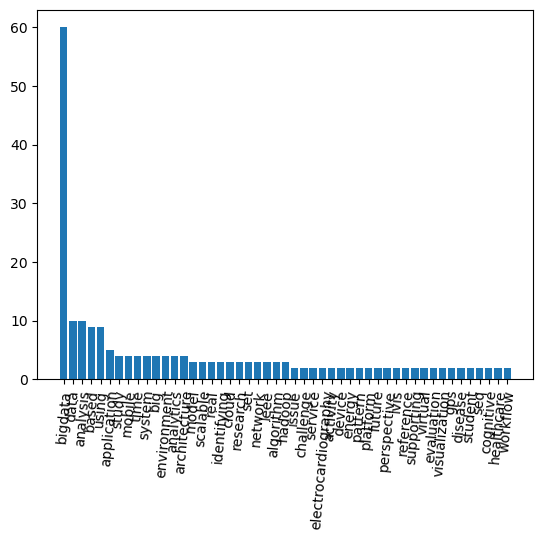

In [17]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show()

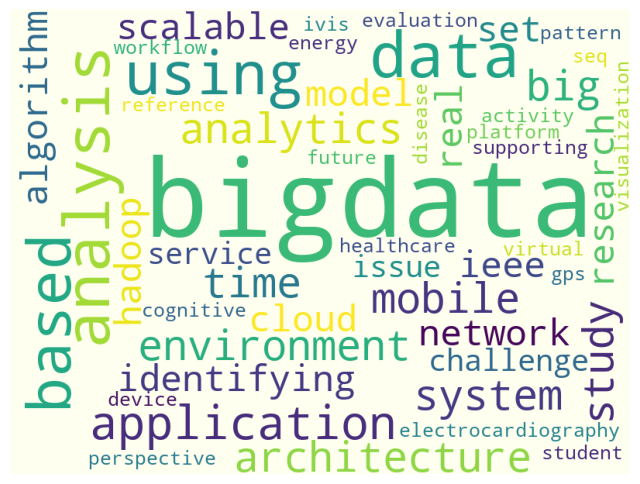

In [18]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, 
height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()